In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep.prepare import PrepareData

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = r'C:\Users\jthan\OneDrive\Desktop\2023\PP\ElectionSL\data\final.csv'

df = pd.read_csv(path, index_col=0).reset_index()
print(df.shape)

df_copy = df.copy()

(3113, 45)


In [2]:
drop_columns = ['2016_winner', 'FIPS', 'Code', 'Population', 'DEM_per', 'REP_per', 'OTH_per', 'fips_x', 'county', 'state_abbr', 'state', 'fips_y']

df.drop(drop_columns, axis=1, inplace=True)

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

df_train, df_test = train_test_split(df, test_size=0.4, shuffle=True, random_state=42)

# split train data set
X_train = df_train.loc[:, df_train.columns != '2020_winner']
y_train = df_train['2020_winner']

# encode y 
encoded_y_train = label_encoder.fit_transform(y_train)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))

# split test data set
X_test = df_test.loc[:, df_test.columns != '2020_winner']
y_test = df_test['2020_winner']

# encode y 
encoded_y_test = label_encoder.fit_transform(y_test)

X_train.head()

,index,per_hs,per_coll,per_grad,EST_RACE_T_POP_One_race_White,EST_RACE_T_POP_One_race_AA,EST_RACE_T_POP_One_race_AI,EST_RACE_T_POP_One_race_Asian,Percent_T_housing_units,"Percent_CITIZEN,_VOTE,_18_and_over_POP","Percent_CITIZEN,_VOTE,_18_and_over_POP_Male","Percent_CITIZEN,_VOTE,_18_and_over_POP_Female",EST_Percent_T_POP_AGE_20_to_24_years,EST_Percent_T_POP_AGE_25_to_29_years,EST_Percent_T_POP_AGE_35_to_39_years,EST_Percent_T_POP_AGE_40_to_44_years,EST_Percent_T_POP_AGE_45_to_49_years,EST_Percent_T_POP_AGE_50_to_54_years,EST_Percent_T_POP_AGE_55_to_59_years,EST_Percent_T_POP_AGE_60_to_64_years,EST_Percent_T_POP_AGE_65_to_69_years,EST_Percent_T_POP_AGE_70_to_74_years,EST_Percent_T_POP_AGE_75_to_79_years,EST_Percent_T_POP_AGE_80_to_84_years,EST_Percent_T_POP_AGE_85_YO,EST_Percent_Female_T_POP_SUM_Sex_ratio_(MP100F),EST_HH_Median_income_(dollars),MOE_HH_Median_income_(dollars),EST_HH_Mean_income_(dollars),MOE_HH_Mean_income_(dollars),EST_T_CE_POP_16_YO,EST_T_PERCENT_ALLOCATED_Occupation
503,503,37.2155,40.5423,4.9494,17905,7285,164,105,NaN,19999,46.5,53.5,5.8,7.1,5.3,7.2,5.9,6.8,7.5,6.7,6.3,4.3,3.5,1.9,2.4,NaN,39221.0,3569.0,53108,3007,10885,13.8
1321,1321,37.8257,50.8550,4.7842,6347,37,15,59,NaN,5260,49.6,50.4,4.5,4.0,4.3,4.6,5.3,6.0,8.4,8.3,8.0,5.0,5.2,3.6,5.3,NaN,57802.0,5090.0,74952,4376,3288,7.4
2314,2314,36.7376,44.8014,7.7078,46366,15566,213,210,NaN,49969,47.5,52.5,5.2,6.1,5.6,5.8,6.3,6.9,6.9,7.4,6.7,4.7,3.4,2.0,1.8,NaN,53980.0,1870.0,65336,2541,28160,13.3
2862,2862,30.4059,52.6105,6.7451,22326,12254,208,588,NaN,29522,54.6,45.4,6.2,7.5,8.2,7.0,5.8,6.5,6.1,6.2,5.1,3.4,2.6,1.5,1.3,NaN,75123.0,5629.0,92280,5617,15111,16.9
1340,1340,27.2466,56.9598,7.9088,54943,682,228,277,NaN,45032,49.9,50.1,4.9,4.5,5.0,5.1,4.9,6.6,8.1,8.2,7.6,5.6,4.0,3.2,3.6,NaN,59456.0,2188.0,76115,2247,28521,10.2


In [4]:
import time
from sklearn.tree import DecisionTreeClassifier

start = time.time()

tree_clf = DecisionTreeClassifier(
    random_state=42
    )

tree_clf.fit(
    X_train, 
    encoded_y_train
)

end = time.time()
true_time = end - start

print(f"Training time: {true_time} seconds")

Training time: 0.08498239517211914 seconds


In [5]:
from sklearn.metrics import f1_score

start = time.time()

y_pred = tree_clf.predict(X_test)

end = time.time()
true_time = end - start

print(f"Prediction time: {true_time} seconds")
f1_score(encoded_y_test, y_pred)
print(f"F1 score: {round(f1_score(y_test, y_pred), 4)*100}%")

Prediction time: 0.0010099411010742188 seconds


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['Biden' 'Trump'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [ ]:
from sklearn.model_selection import cross_validate

# use cross validation to check how it sees new data
decision_tree_result = cross_validate(tree_clf, X_train, y_train, scoring="f1", cv=5)

print(decision_tree_result['test_score'])
print(f"avg score: {round(decision_tree_result['test_score'].mean()*100, 4)}%")

c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **sc

[nan nan nan nan nan]
avg score: nan%


c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **sc

[[0.89291598 0.89967638 0.89261745 0.90584416 0.87804878]
 [0.8776509  0.89376054 0.89932886 0.90033223 0.89320388]
 [0.90140845 0.90311987 0.91325696 0.89354839 0.91111111]
 [0.90675241 0.88741722 0.9205298  0.92058347 0.89633174]
 [0.91798107 0.9004894  0.93075684 0.91023622 0.91082803]
 [0.91573927 0.91437803 0.93354943 0.91382114 0.92307692]
 [0.91987179 0.90553746 0.93333333 0.91290323 0.91318328]
 [0.9248     0.89517471 0.92948718 0.91639871 0.92822967]
 [0.91262136 0.91542289 0.93289689 0.91639871 0.91943128]
 [0.91290323 0.92508143 0.93964111 0.92356688 0.88996764]]


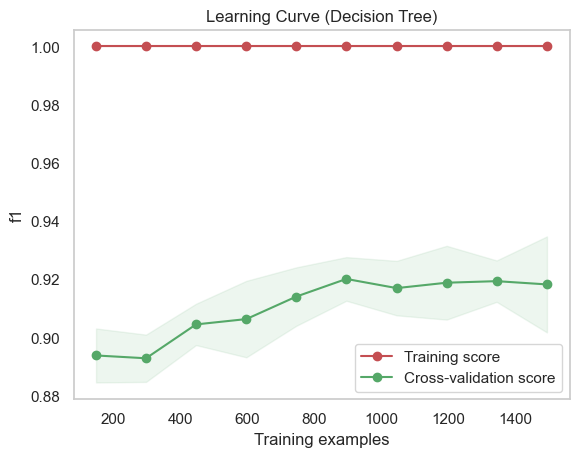

In [6]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
        tree_clf, X_train, encoded_y_train, cv=None, n_jobs=10,scoring="f1", train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
sns.set(style="whitegrid")
plt.title("Learning Curve (Decision Tree)")

plt.xlabel("Training examples")
plt.ylabel("f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")

plt.legend(loc="best")

print(test_scores)
plt.show()

Depth of tree: 18


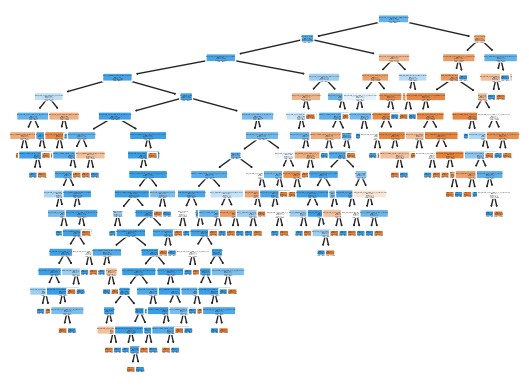

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure
plot_tree(
    tree_clf,
    feature_names=list(X_test.columns),
    class_names=list(df_copy['2020_winner'].unique()),
    rounded=True,
    filled=True
)

print(f"Depth of tree: {tree_clf.get_depth()}")

plt.show()

precision: 92.992992992993 = 929/929 + 70
recall: 90.01937984496125 = 929/929 + 103
--------------------------------------------------
{'Biden': 0, 'Trump': 1}


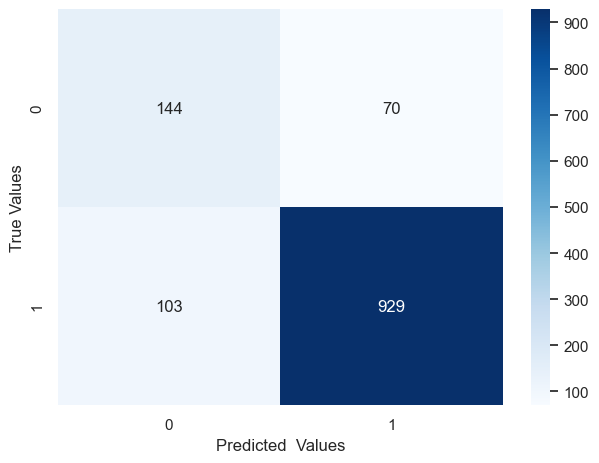

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

cm = confusion_matrix(encoded_y_test, y_pred)

ax = sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g'
)

ax.set(xlabel="Predicted  Values", ylabel="True Values")

print(f"precision: {precision_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[0,1]}")
print(f"recall: {recall_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[1,0]}")
print('-'*50)
print(label_encoder_name_mapping)

plt.tight_layout()
plt.show()

## validation curves 

train_mean: [0.9290205  0.93825554 0.94160191 0.94970528 0.95652291 0.96558248
 0.97303298 0.97935543 0.98434489]
train_std: [0.00094605 0.00129774 0.00068193 0.00184013 0.00230616 0.00281702
 0.00216025 0.00212496 0.0022997 ]
test_mean: [0.92777901 0.93516425 0.93309696 0.9362797  0.93718736 0.9403933
 0.93581399 0.93137439 0.9317257 ]
test_std: [0.00902532 0.01076902 0.01117291 0.00992661 0.00859585 0.01034466
 0.01551487 0.01101523 0.0133529 ]


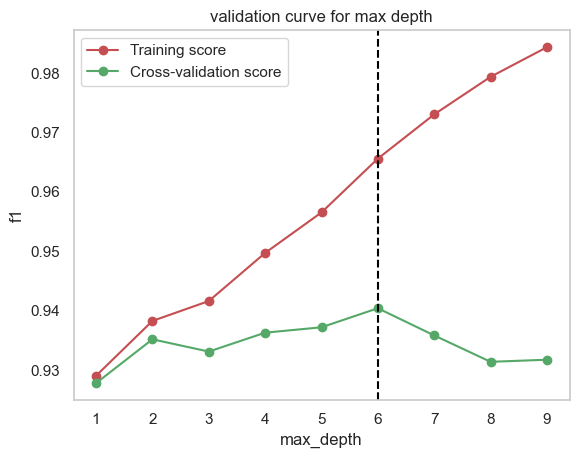

In [12]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 10, 1)

hyper_param = 'max_depth'
metric = 'f1'

train_scores, test_scores = validation_curve(
    tree_clf, X_train, encoded_y_train,
    param_name=hyper_param,
    param_range=param_range,
    cv=10,
    scoring=metric,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print(f"train_mean: {train_mean}")
print(f"train_std: {train_std}")
print(f"test_mean: {test_mean}")
print(f"test_std: {test_std}")

plt.figure()
plt.xlabel(hyper_param)
plt.ylabel(metric)
plt.grid()
plt.title('validation curve for max depth')
plt.plot(param_range, train_mean, 'o-', label="Training score", color="r")
plt.plot(param_range, test_mean, 'o-', label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.axvline(x=6, color='black', linestyle='--')
plt.show()

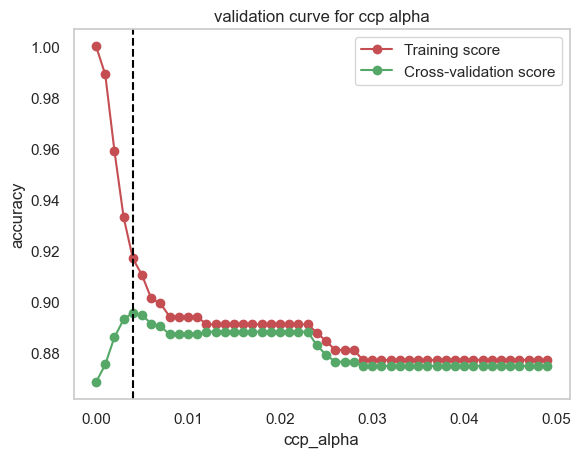

In [16]:
from sklearn.model_selection import validation_curve

param_range = np.arange(0, 0.05, 0.001)

hyper_param = 'ccp_alpha'
metric = 'accuracy'

train_scores, test_scores = validation_curve(
    tree_clf, X_train, encoded_y_train,
    param_name=hyper_param,
    param_range=param_range,
    cv=4,
    scoring=metric,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.xlabel(hyper_param)
plt.ylabel(metric)
plt.grid()
plt.title('validation curve for ccp alpha')
plt.plot(param_range, train_mean, 'o-', label="Training score", color="r")
plt.plot(param_range, test_mean, 'o-', label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.axvline(x=0.004, color='black', linestyle='--')
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': np.arange(0, 20, 1),
    'ccp_alpha': np.arange(0, 0.05, 0.001)  
}

grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print(f"Best max depth: {best_max_depth}")
print(f"Best ccp alpha: {best_ccp_alpha}")
print(f"Best score: {best_score}")

Best max depth: 7
Best ccp alpha: 0.004
Best score: 0.896619403306046


c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\jthan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\bas

## Pruned Model

In [18]:
start = time.time()

tree_clf = DecisionTreeClassifier(
    ccp_alpha=best_ccp_alpha,
    max_depth=best_max_depth,
    random_state=42
    )

tree_clf.fit(X_train, encoded_y_train)

end = time.time()
true_time = end - start

print(f"Training time: {true_time} seconds")

Training time: 0.04672670364379883 seconds


In [19]:
start = time.time()

y_pred = tree_clf.predict(X_test)

end = time.time()
true_time = end - start

print(f"Prediction time: {true_time} seconds")
f1_score(encoded_y_test, y_pred)
print(f"F1 score: {round(f1_score(encoded_y_test, y_pred), 4)*100}%")

Prediction time: 0.0019974708557128906 seconds
F1 score: 93.08%


In [21]:
from sklearn.model_selection import cross_validate

decision_tree_result = cross_validate(tree_clf, X_train, encoded_y_train, scoring='f1', cv=5)

print(decision_tree_result['test_score'])
print(f"avg score: {round(decision_tree_result['test_score'].mean()*100, 4)}%")

[0.93739968 0.94462541 0.9376     0.94154818 0.93103448]
avg score: 93.8442%


Depth of tree: 5


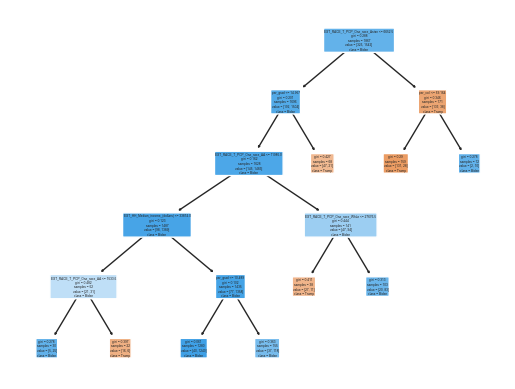

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure
plot_tree(
    tree_clf,
    feature_names=list(X_test.columns),
    class_names=list(df_copy['2020_winner'].unique()),
    rounded=True,
    filled=True
)

print(f"Depth of tree: {tree_clf.get_depth()}")

plt.show()

[[0.89291598 0.89967638 0.89261745 0.90584416 0.87804878]
 [0.88311688 0.90909091 0.91027732 0.88707038 0.88816856]
 [0.92141757 0.91176471 0.92604502 0.896      0.90566038]
 [0.92551506 0.91760905 0.92763158 0.92282958 0.90620032]
 [0.92527822 0.9184     0.94435612 0.92043682 0.92923077]
 [0.93312102 0.92706645 0.94668821 0.92259084 0.9245283 ]
 [0.93312102 0.93159609 0.94855305 0.93269231 0.93375394]
 [0.9376     0.9184     0.93910256 0.93858268 0.93396226]
 [0.93799682 0.93290735 0.94516129 0.94154818 0.93206951]
 [0.93739968 0.94462541 0.9376     0.94154818 0.93103448]]


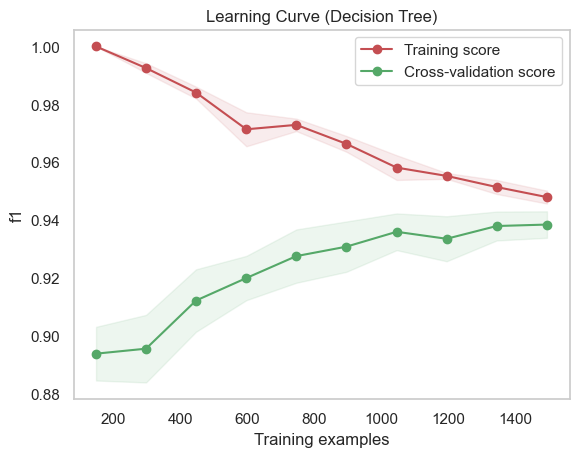

In [25]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
        tree_clf, X_train, encoded_y_train, cv=None, n_jobs=10, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.title("Learning Curve (Decision Tree)")

plt.xlabel("Training examples")
plt.ylabel("f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")

plt.legend(loc="best")

print(test_scores)
plt.show()

precision: 93.03000968054211 = 961/961 + 72
recall: 93.12015503875969 = 961/961 + 71
--------------------------------------------------
{'Biden': 0, 'Trump': 1}


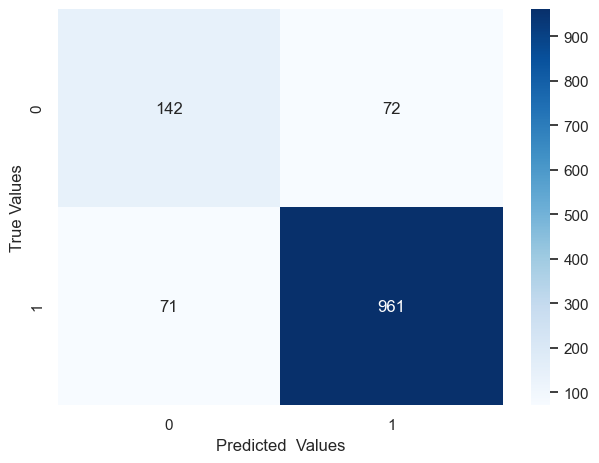

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

cm = confusion_matrix(encoded_y_test, y_pred)

ax = sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g'
)

ax.set(xlabel="Predicted  Values", ylabel="True Values")

print(f"precision: {precision_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[0,1]}")
print(f"recall: {recall_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[1,0]}")
print('-'*50)
print(label_encoder_name_mapping)

plt.tight_layout()
plt.show()

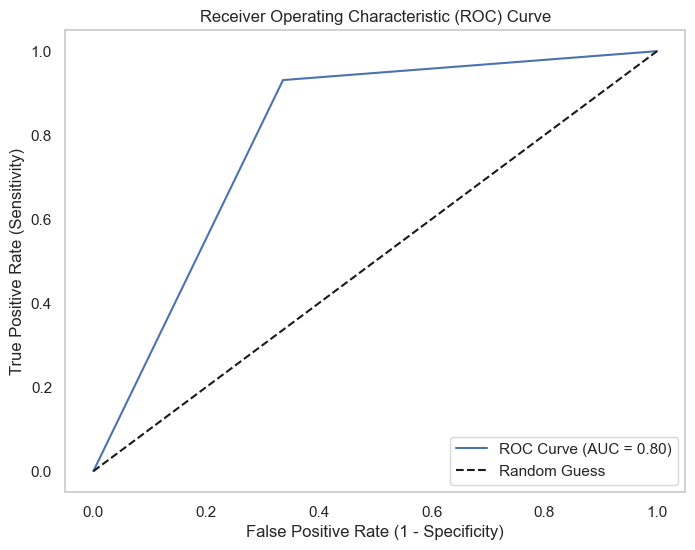

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(encoded_y_test, y_pred)
auc = roc_auc_score(encoded_y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()
